# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência. 
Feito por (Luciano Galdino)

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [1]:
import numpy as np
import pandas as pd

In [6]:
dados = pd.read_csv('heart.csv',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## **Exploração dos Dados**

In [7]:
dados.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
dados.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [9]:
dados.shape

(918, 12)

## **Análise das Variáveis (Atributos)**

### **Age = idade**

In [10]:
dados['Age'].value_counts()

Age
54    51
58    42
55    41
56    38
57    38
52    36
51    35
59    35
62    35
53    33
60    32
48    31
61    31
63    30
50    25
46    24
41    24
43    24
64    22
65    21
49    21
47    19
44    19
42    18
45    18
38    16
67    15
39    15
66    13
69    13
40    13
35    11
37    11
68    10
34     7
74     7
70     7
36     6
71     5
32     5
72     4
29     3
75     3
33     2
77     2
76     2
31     2
30     1
28     1
73     1
Name: count, dtype: int64

In [11]:
dados['Age'].value_counts().sort_index()

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64

In [12]:
import plotly.express as px

In [13]:
#Plotagem de Grafico para ver a distribuicao dos dados

hist1 =  px.histogram (dados,  x = "Age", nbins=60) 
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades') 
hist1.show()

In [3]:
import seaborn as sns

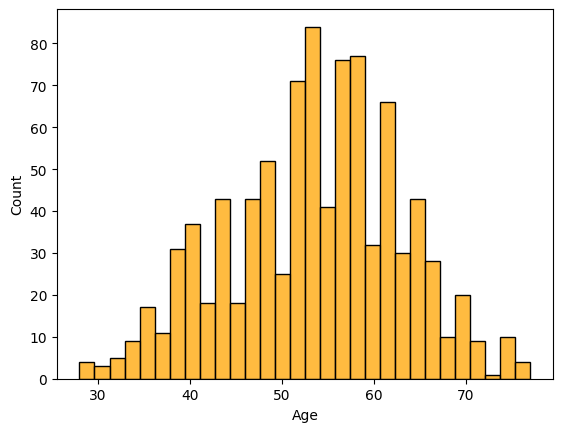

In [20]:
# outra forma de plotar histograma
sns.histplot(dados, x='Age', bins=30, color="orange", stat="count");
# kde linha de tendencia

### **Sex = sexo**

In [15]:
dados['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

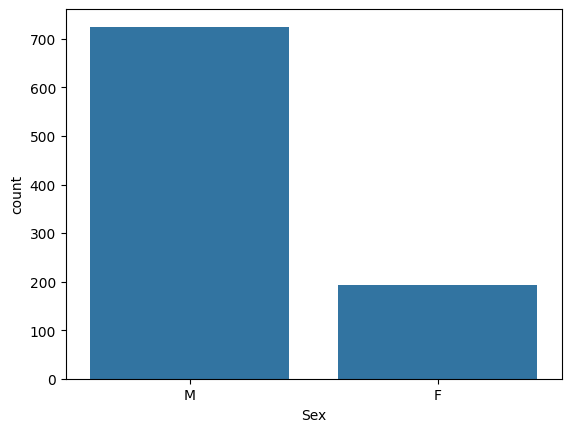

In [18]:
sns.countplot(x='Sex', data=dados);

### **Chest Pain Type = tipo de dor no peito**

In [19]:
dados['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

ASY: assintomático.

NAP: dor não anginosa.

ATA: angina atípica.

TA: angina típica.

Angina:Dor no peito causada pela diminuição do fluxo de sangue no coração





<Axes: xlabel='ChestPainType', ylabel='count'>

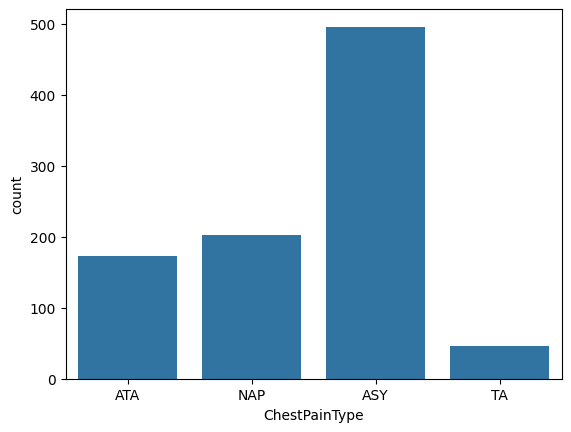

In [26]:
sns.countplot(x='ChestPainType', data=dados)

### **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

In [28]:
dados['RestingBP'].value_counts().sort_index()

RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64

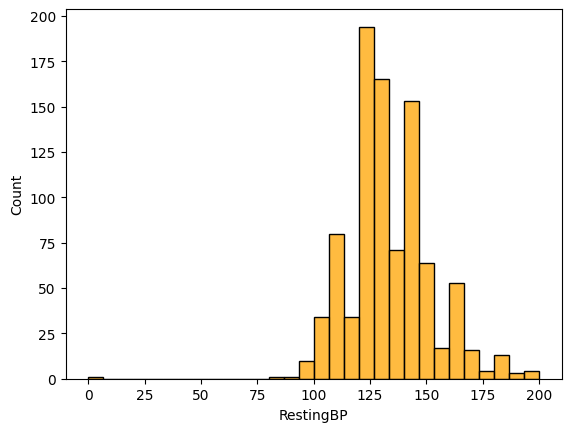

In [27]:
sns.histplot(dados, x='RestingBP', bins=30, color="orange", stat="count");

### **Cholesterol = colesterol sérico (mg/dl)**

In [21]:
dados.Cholesterol.value_counts().sort_index()

Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64

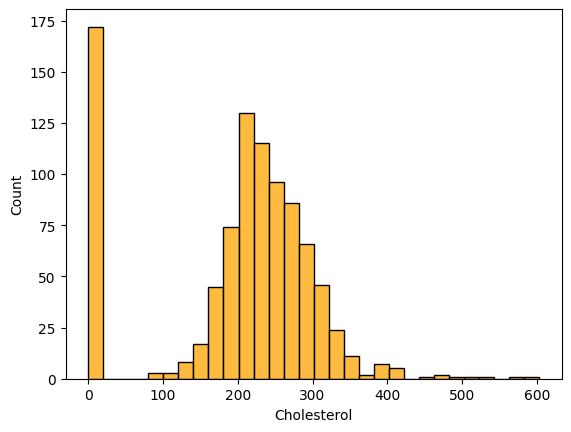

In [31]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange",  stat="count");

### **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [32]:
dados.FastingBS.value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

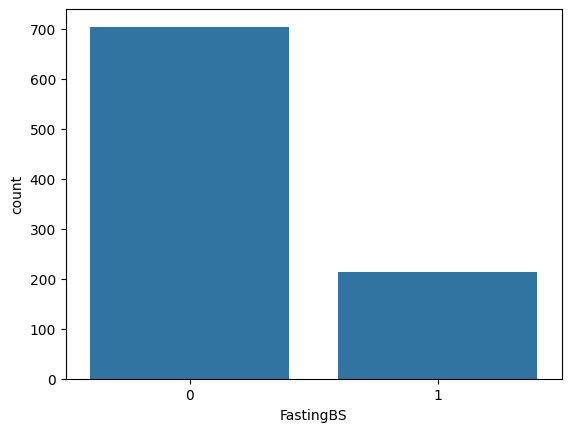

In [33]:
sns.countplot(x='FastingBS', data=dados);

### **Resting ECG = eletrocardiograma em repouso**

In [34]:
dados.RestingECG.value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

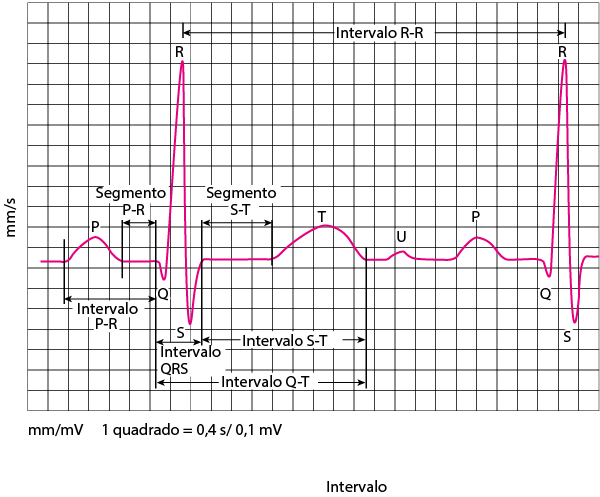

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

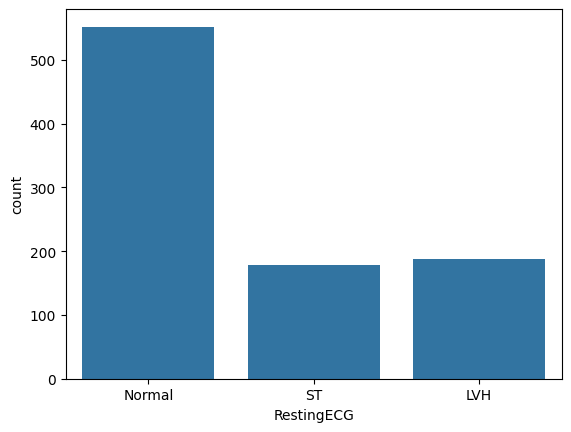

In [35]:
sns.countplot(x='RestingECG', data=dados);

### **Max HR (heart rate) = frequência cardíaca máxima**

In [36]:
dados['MaxHR'].value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

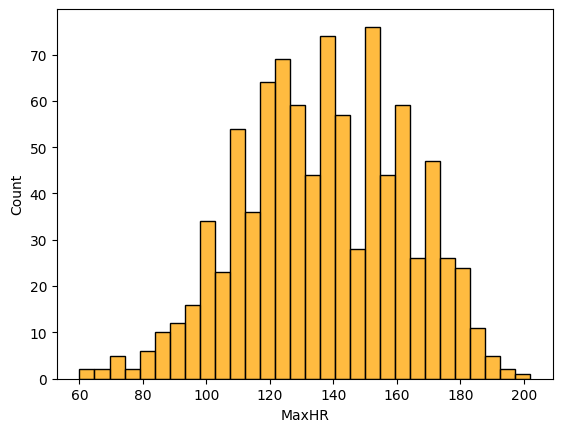

In [38]:
sns.histplot(dados, x='MaxHR', bins=30, color="orange", stat="count");

### **Exercise Angina = Angina induzida por exercício**

In [39]:
dados['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [40]:
px.pie(dados, 'ExerciseAngina') 

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

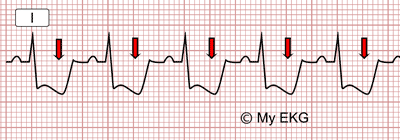

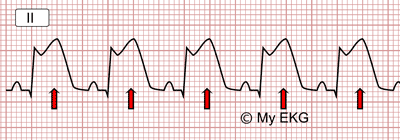

In [41]:
dados['Oldpeak'].value_counts()

Oldpeak
 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.9      7
 1.3      7
 2.6      7
 1.1      7
 1.7      6
 2.2      5
 0.9      4
 2.4      4
 3.6      4
 3.4      3
 4.2      2
 3.5      2
-0.5      2
 2.3      2
 3.2      2
 2.1      2
-1.0      2
-0.1      2
 5.6      1
 2.9      1
 6.2      1
 3.8      1
-1.5      1
 3.1      1
-2.0      1
 3.7      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 4.4      1
Name: count, dtype: int64

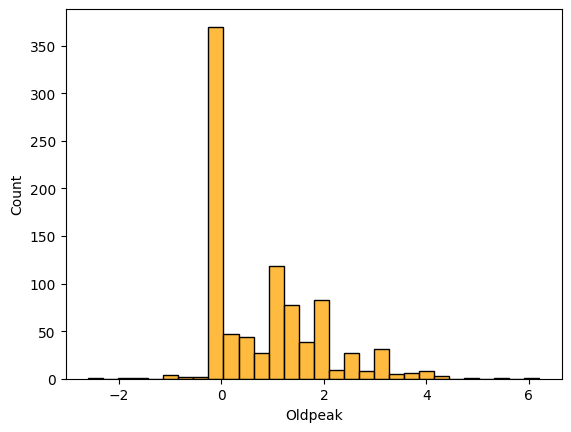

In [43]:
sns.histplot(dados, x='Oldpeak', bins=30, color="orange", stat="count");

### **ST_Slope = Inclinação do segmento ST no ECG**

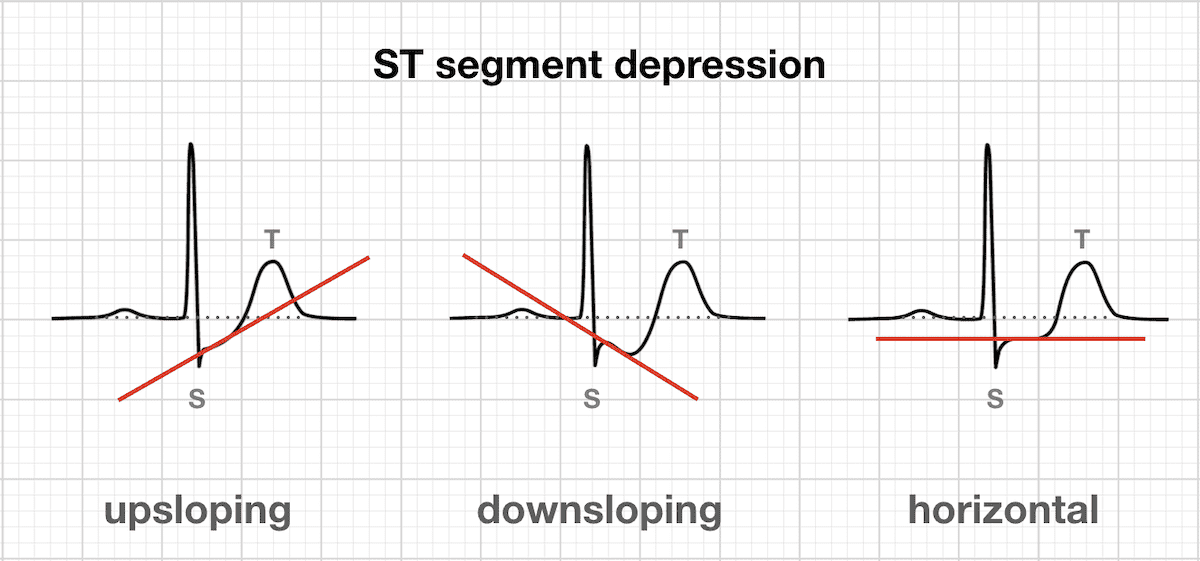

In [44]:
dados['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Flat = plano

Up = para cima

Down = para baixo 

In [45]:
px.pie(dados, 'ST_Slope') 

### **Heart Disease = Doença cardíaca**

In [46]:
dados['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

0 = Não possui doença cardíaca

1 = Possui doença cardíaca



In [47]:
px.pie(dados, 'HeartDisease')

## **Análise dos tipos de atributos.**

In [48]:
# object: strings
# int64: inteiros
# float64: reais
# complex: complexos
dados.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## **Valores Missing (NAN)**

In [49]:
# RELAÇÃO DA QUANTIDADE
dados.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [50]:
# EXCLUIR VALORES MISSING
dados2 = dados.dropna()

In [51]:
dados2.shape

(918, 12)

In [52]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [53]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Age'].fillna(dados2['Age'].mean(), inplace=True)

C:\Users\reixx\AppData\Local\Temp\ipykernel_35544\635995625.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [54]:
# SUBSTITUIR OS VALORES MISSING POR QUALQUER OUTRO VALOR
dados2['Age'].fillna(10, inplace=True)

C:\Users\reixx\AppData\Local\Temp\ipykernel_35544\2566207173.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





## **Análises Estatísticas Descritivas**

In [55]:
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [56]:
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### **Tratando Valores Incoerentes**

**Excluindo registro com pressão zero**

In [59]:
dados2 = dados.loc[dados.RestingBP != 0] 

In [58]:
dados2.shape

(917, 12)

In [60]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Substituindo valores zeros do Colesterol pela média sem os zeros**

In [61]:
dados2.Cholesterol.mean()

199.0163576881134

In [62]:
dados2.Cholesterol.replace(0, np.NaN, inplace=True)

C:\Users\reixx\AppData\Local\Temp\ipykernel_35544\2326438397.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\reixx\AppData\Local\Temp\ipykernel_35544\2326438397.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [63]:
dados2.isnull().sum()

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [64]:
dados2.Cholesterol.mean()

244.6353887399464

In [65]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean(), inplace=True)

C:\Users\reixx\AppData\Local\Temp\ipykernel_35544\1774308199.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
dados2.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [68]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [69]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


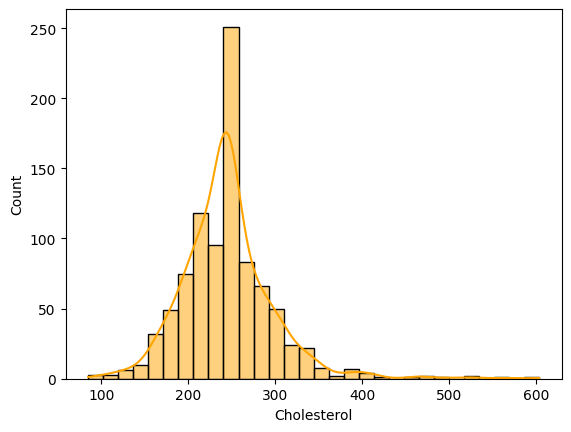

In [70]:
sns.histplot(dados2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Análise de Outliers**

In [71]:
# Idade
px.box(dados2, y='Age')

In [72]:
# Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

In [73]:
# Colesterol
px.box(dados2, y='Cholesterol')

In [74]:
# Frequência Cardíaca Máxima
px.box(dados2, y='MaxHR')

## **Salvando (Exportando) o Dataframe Tratado**

In [75]:
dados2.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index = False)